<a href="https://colab.research.google.com/github/SurajLahariya/DS_learning/blob/main/Assignment_18_CocaCola_Sales__forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import necessary libraries

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import statsmodels.formula.api as smf

from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.arima_model import ARMA, ARIMA

import itertools

## 2. Data collection

In [ ]:
df = pd.read_excel(r'C:\Users\sawaled\Desktop\Personal\data\Assignement_18_Forecasting\CocaCola_Sales_Rawdata.xlsx',)
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [ ]:
df['Q'] = 0
df['year'] = 0
for i in range(42):
    p=df['Quarter'][i]
    df['Q'][i]=p[0:2]
    df['year'][i]=p[3:]
    
df.head()

,Quarter,Sales,Q,year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


#### ========================================================================================================

## 3. Data Understanding, Visulalization and Preaparation 

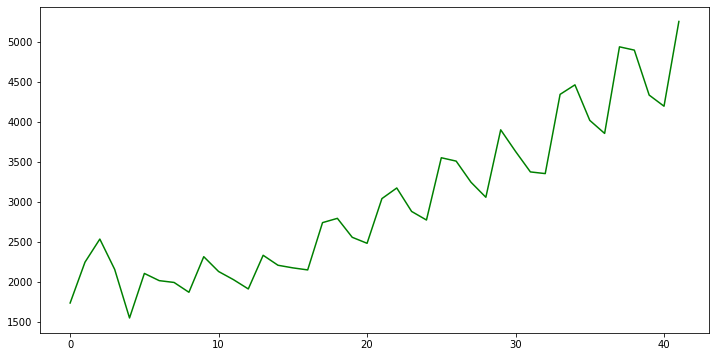

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Sales, color='green')
plt.show()

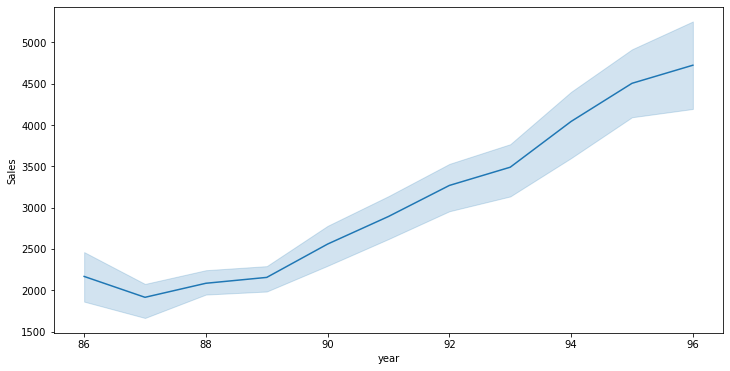

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='year', y='Sales', data=df)
plt.show()

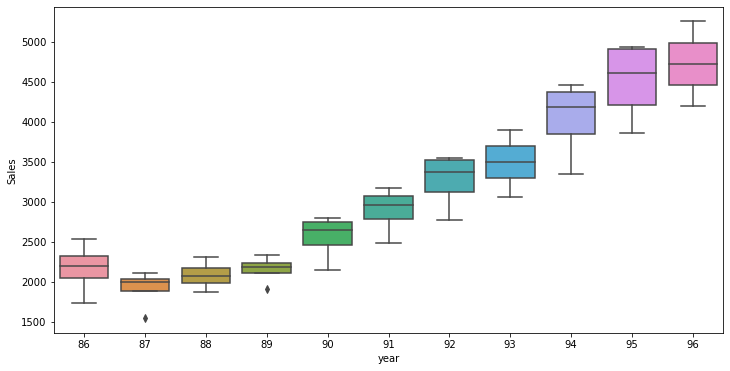

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x= 'year', y='Sales', data=df)
plt.show()

## 3.1 ACF and PACF plot

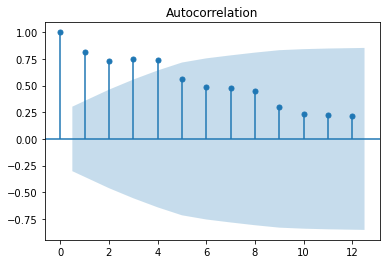

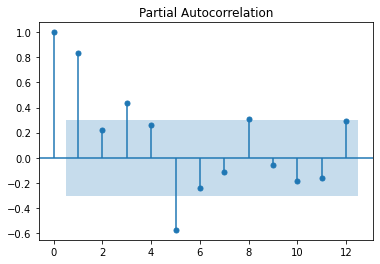

In [ ]:
plot_acf(x= df['Sales'], lags=12)
plot_pacf(x= df['Sales'], lags=12)
plt.show()

## 4. Model building

In [ ]:
df.shape

(42, 4)

In [ ]:
train = df.head(32)
test  = df.tail(10)

In [ ]:
test

,Quarter,Sales,Q,year
32,Q1_94,3352.0,Q1,94
33,Q2_94,4342.0,Q2,94
34,Q3_94,4461.0,Q3,94
35,Q4_94,4017.0,Q4,94
36,Q1_95,3854.0,Q1,95
37,Q2_95,4936.0,Q2,95
38,Q3_95,4895.0,Q3,95
39,Q4_95,4333.0,Q4,95
40,Q1_96,4194.0,Q1,96
41,Q2_96,5253.0,Q2,96


## 5. ARIMA model

In [ ]:
# Performing ADF test to test Stationarity of Data

In [ ]:
result = adfuller(df.Sales.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 1.309421
p-value: 0.996661


In [ ]:
# Since P-value is greater than the significance level, the data is not Stationery.
# let’s difference the series and see how the autocorrelation plot looks like.

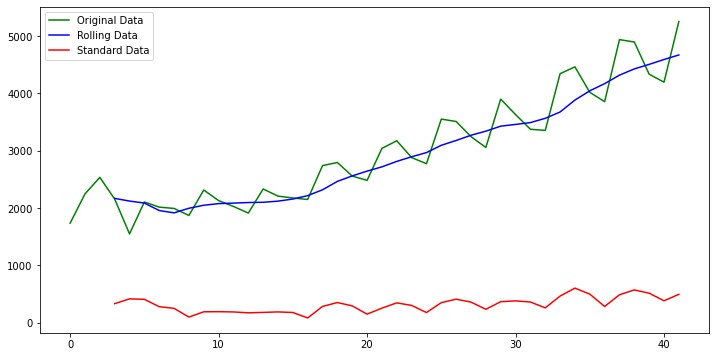

In [ ]:
# Checking whether the input data is stationry or not

df_roll = df['Sales'].rolling(window=4).mean()
df_std = df['Sales'].rolling(window=4).std()

plt.figure(figsize=(12,6))

input_data = plt.plot(df['Sales'],label= 'Original Data', color='g')
rolling = plt.plot(df_roll,label= 'Rolling Data', color='b')
std = plt.plot(df_std,label= 'Standard Data', color='r')
plt.legend(loc='best')
plt.show()

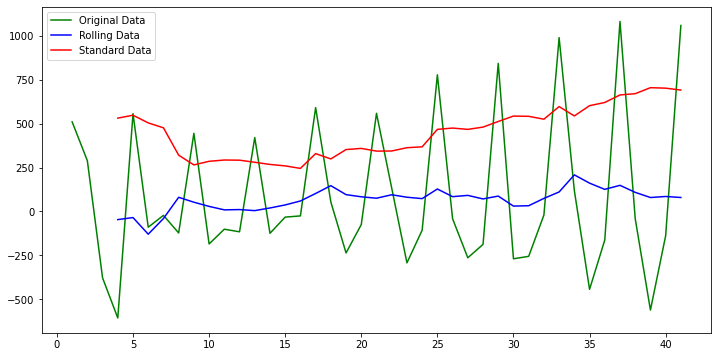

In [ ]:
df_sales_lagged = df['Sales'].diff()
df_roll_lagged = df_sales_lagged.rolling(window=4).mean()
df_std_lagged = df_sales_lagged.rolling(window=4).std()

plt.figure(figsize=(12,6))

input_data = plt.plot(df_sales_lagged,label= 'Original Data', color='g')
rolling = plt.plot(df_roll_lagged,label= 'Rolling Data', color='b')
std = plt.plot(df_std_lagged,label= 'Standard Data', color='r')
plt.legend(loc='best')
plt.show()

In [ ]:
result = adfuller(df.Sales.diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.501537
p-value: 0.115101


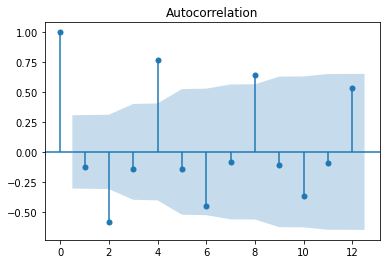

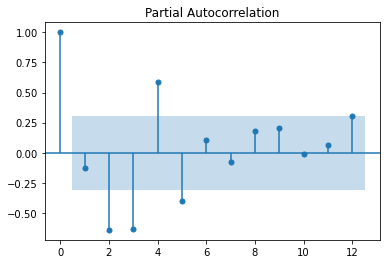

In [ ]:
# Plotting ACF and PACF for lagged values

plot_acf(df['Sales'].diff().dropna() , lags=12)
plot_pacf(df['Sales'].diff().dropna(), lags=12)
plt.show()

In [ ]:
result = adfuller(df.Sales.diff().diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -27.632625
p-value: 0.000000


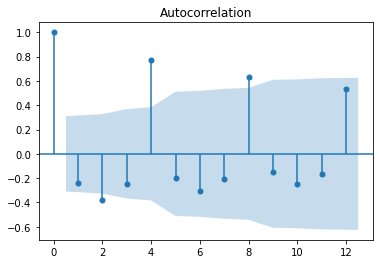

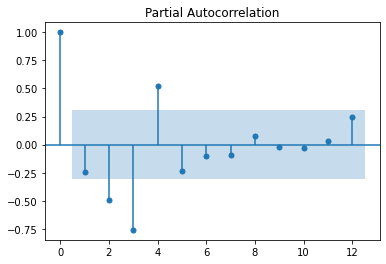

In [ ]:
plot_acf(df['Sales'].diff().diff().dropna() , lags=12)
plot_pacf(df['Sales'].diff().diff().dropna(), lags=12)
plt.show()

In [ ]:
p = range(0,10)
d = range(0,10)
q = range(0,10)

pdq = list(itertools.product(p,d,q))

In [ ]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 0, 8),
 (0, 0, 9),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 1, 9),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 2, 7),
 (0, 2, 8),
 (0, 2, 9),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 3, 7),
 (0, 3, 8),
 (0, 3, 9),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 4, 6),
 (0, 4, 7),
 (0, 4, 8),
 (0, 4, 9),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (0, 5, 6),
 (0, 5, 7),
 (0, 5, 8),
 (0, 5, 9),
 (0, 6, 0),
 (0, 6, 1),
 (0, 6, 2),
 (0, 6, 3),
 (0, 6, 4),
 (0, 6, 5),
 (0, 6, 6),
 (0, 6, 7),
 (0, 6, 8),
 (0, 6, 9),
 (0, 7, 0),
 (0, 7, 1),
 (0, 7, 2),
 (0, 7, 3),
 (0, 7, 4),
 (0, 7, 5),
 (0, 7, 6),
 (0, 7, 7),
 (0, 7, 8),
 (0, 7, 9),
 (0, 8, 0),
 (0, 8, 1),
 (0, 8, 2),
 (0,

In [ ]:
import warnings
warnings.filterwarnings('ignore')

for param in pdq:
    try:
        ARIMA_model = ARIMA(train['Sales'], order=param)
        ARIMA_model_fit = ARIMA_model.fit()
        print(param, ARIMA_model_fit.aic)
    except:            
        continue

(0, 0, 0) 504.8634244592431
(0, 0, 1) 488.2943465298915
(0, 0, 2) 468.9081020119421
(0, 0, 3) 470.88425077173315
(0, 0, 4) 466.33624588844873
(0, 1, 0) 456.42274234039724
(0, 1, 1) 449.16175426944164
(0, 1, 2) 449.16464105995055
(0, 1, 3) 447.6300096213802
(0, 1, 4) 433.0613127904097
(0, 1, 5) 438.23788123172017
(0, 1, 6) 438.95730408881246
(0, 1, 7) 439.5127288904408
(0, 1, 8) 431.5178110362821
(0, 1, 9) 436.0866436823463
(0, 2, 0) 467.565246479043
(0, 2, 1) 448.24565150299827
(0, 2, 2) 438.8002981772898
(0, 2, 3) 439.9794833314614
(0, 2, 5) 425.31095605439475
(0, 2, 6) 425.2624443795288
(0, 2, 7) 426.73758584048596
(0, 2, 9) 423.53720258186434
(1, 0, 0) 472.5800372242106
(1, 0, 1) 471.6159732850941
(1, 0, 2) 690.9701913684395
(1, 0, 3) 467.48570463485396
(1, 0, 4) 452.7771859703671
(1, 0, 6) 456.5831936637436
(1, 1, 0) 457.3274834573187
(1, 1, 1) 450.60865147011987
(1, 1, 2) 450.9617863152412
(1, 1, 3) 444.65896188232034
(1, 1, 4) 434.27259240408296
(1, 1, 5) 435.8443773052622
(1, 1,

In [ ]:
ARIMA_final = ARIMA(train['Sales'], order=(3, 2, 0))
ARIMA_final_fit = ARIMA_final.fit(disp=0)

In [1]:
pred = ARIMA_final_fit.predict(start= test[0], end= test[-1])

In [ ]:
forecast = ARIMA_final_fit.forecast(steps=10)[0]
forecast

array([3307.79240976, 4096.96592054, 3788.17270605, 3562.28344608,
       3606.67709157, 4335.24625707, 3995.21330411, 3811.04414158,
       3951.3452604 , 4614.27317378])

<AxesSubplot:ylabel='Density'>

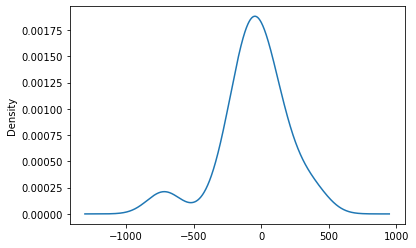

In [ ]:
ARIMA_final_fit.resid.plot(kind= 'kde')

In [ ]:
def RMSE(act,pred):
    MSE = np.mean((act-pred)**2)
    return np.sqrt(MSE)

In [ ]:
RMSE(test['Sales'], forecast)

518.8873385540003

#### ========================================================================================================